In [58]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('movieReplicationSet.csv')

In [60]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [61]:
rating_counts = df.iloc[:, 0:400].count()
rating_counts

The Life of David Gale (2003)                 76
Wing Commander (1999)                         71
Django Unchained (2012)                      453
Alien (1979)                                 289
Indiana Jones and the Last Crusade (1989)    463
                                            ... 
Patton (1970)                                 61
Anaconda (1997)                              198
Twister (1996)                               174
MacArthur (1977)                              61
Look Who's Talking (1989)                    108
Length: 400, dtype: int64

In [62]:
sorted_movies = rating_counts.sort_values(ascending=False)
sorted_movies

Finding Nemo (2003)          1014
Shrek (2001)                 1008
Shrek 2 (2004)                965
The Lion King (1994)          937
Monsters  Inc.(2001)          927
                             ... 
Stir Crazy (1980)              59
FeardotCom (2002)              56
Sexy Beast (2000)              56
The Final Conflict (1981)      55
Best Laid Plans (1999)         54
Length: 400, dtype: int64

In [63]:
median_count = sorted_movies.median()
median_count

197.5

In [64]:
high_popularity_movies = sorted_movies[sorted_movies >= median_count].index
low_popularity_movies = sorted_movies[sorted_movies < median_count].index


In [65]:
high_popularity_movies

Index(['Finding Nemo (2003)', 'Shrek (2001)', 'Shrek 2 (2004)',
       'The Lion King (1994)', 'Monsters  Inc.(2001)', 'Toy Story (1995)',
       'Toy Story 2 (1999)', 'Avatar (2009)', 'Ice Age (2002)',
       'Titanic (1997)',
       ...
       'Rain Man (1988)', 'Braveheart (1995)', 'Anger Management (2002)',
       'Minority Report (2002)', 'Daredevil (2003)', 'Reservoir Dogs (1992)',
       'My Best Friend's Wedding (1997)',
       'There's Something About Mary (1998)', 'Halloween (1978)',
       'Anaconda (1997)'],
      dtype='object', length=200)

In [66]:
popular_df = df[high_popularity_movies]
unpopular_df = df[low_popularity_movies]

In [67]:
popular_df

,Finding Nemo (2003),Shrek (2001),Shrek 2 (2004),The Lion King (1994),Monsters Inc.(2001),Toy Story (1995),Toy Story 2 (1999),Avatar (2009),Ice Age (2002),Titanic (1997),...,Rain Man (1988),Braveheart (1995),Anger Management (2002),Minority Report (2002),Daredevil (2003),Reservoir Dogs (1992),My Best Friend's Wedding (1997),There's Something About Mary (1998),Halloween (1978),Anaconda (1997)
0,3.5,3.0,3.5,4.0,NaN,4.0,3.0,3.5,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1,4.0,3.0,2.0,NaN,4.0,3.0,1.0,1.5,NaN,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,3.5,3.5,4.0,4.0,NaN,NaN,3.0,4.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.5,0.5,1.0,3.0,3.0,3.0,3.0,NaN,1.0,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.5,3.0,3.0,4.0,3.0,2.5,2.5,3.5,2.5,1.5,...,NaN,NaN,NaN,1.0,2.5,NaN,3.5,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.5,3.0,2.5,3.5,3.0,4.0,3.5,3.0,3.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,4.0,4.0,3.5,3.5,3.5,3.5,3.5,4.0,4.0,3.5,...,4.0,3.0,3.5,2.5,NaN,4.0,4.0,4.0,4.0,3.5
1094,1.5,3.5,3.5,NaN,2.5,3.0,3.0,4.0,3.0,1.5,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,4.0,2.5,NaN,NaN,NaN,3.0,2.5,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
flattened_popular = [item for sublist in popular_df.values.T.tolist() for item in sublist]
flattened_unpopular = [item for sublist in unpopular_df.values.T.tolist() for item in sublist]
t_stat, p_value = ttest_ind(flattened_popular, flattened_unpopular, nan_policy='omit', alternative='greater')
print(t_stat, p_value)


60.5311168931626 0.0


In [80]:
t_stat, p_value = ttest_ind(flattened_popular, flattened_unpopular, nan_policy='omit', equal_var=False)
print(t_stat, p_value)

56.74324476674131 0.0


In [70]:
# -------------------

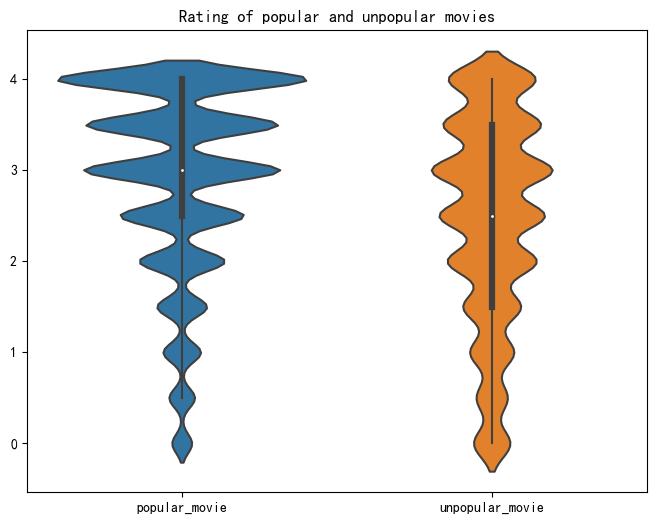

In [71]:
plt.figure(figsize=(8,6))
sns.violinplot(data=[flattened_popular, flattened_unpopular])
plt.xticks([0, 1], ['popular_movie', 'unpopular_movie'])
plt.title('Rating of popular and unpopular movies')
plt.show()

In [79]:
import numpy as np
from scipy.stats import levene

# 生成两组模拟数据


# 执行 Levene's test
stat, p = levene(pd.Series(flattened_popular).dropna(), pd.Series(flattened_unpopular).dropna())

print(f"Levene's Test Statistic: {stat}")
print(f"P-Value: {p}")

if p < 0.005:
    print("Variances are significantly different")
else:
    print("Variances are not significantly different")

Levene's Test Statistic: 692.267436620545
P-Value: 4.172014642871572e-152
Variances are significantly different


In [78]:
pd.Series(flattened_popular).dropna()

0         3.5
1         4.0
2         3.5
3         2.5
4         2.5
         ... 
219368    3.0
219375    1.5
219381    2.0
219389    1.0
219396    3.5
Length: 90214, dtype: float64

In [84]:
np.mean(pd.Series(flattened_popular).dropna())

2.9234764005586715

In [85]:
np.mean(pd.Series(flattened_unpopular).dropna())

2.450613636363636